# 의사결정나무
- 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘  
장점 : 대소 구분하는 것이므로 표준화를 할 필요없음

### 문제 정의
서울 지역(구)의 경도와 위도 정보를 사용하여    
임의로 입력된 지역(동)을 강동,강서,강남,강북으로 분류해보는 예제

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("../Data/seoul_district.csv")
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [3]:
test_df = pd.read_csv("../Data/seoul_dong.csv")
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [4]:
# 레이블의 갯수 확인
train_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [5]:
test_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

# 데이터 전처리

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dong       20 non-null     object 
 1   longitude  20 non-null     float64
 2   latitude   20 non-null     float64
 3   label      20 non-null     object 
dtypes: float64(2), object(2)
memory usage: 768.0+ bytes


In [8]:
# 경도와 위도의 평균과 편차
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


> 경도와 위도는 동일한 단위를 사용      
> 의사결정나무는 각 특징을 독립적으로 사용하기 때문에 별다른 전처리 과정이 필요 없음        

# 데이터 시각화


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

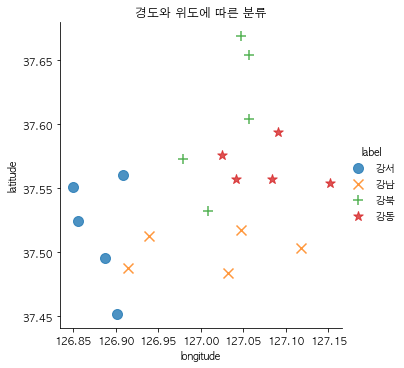

In [17]:
# train_df의 위도 경도에 해당하는 label을 시각화 하려고 한다.
import seaborn as sns

sns.lmplot(
    'longitude',
    'latitude',
    data=train_df,
    fit_reg=False,
    markers=['o','x','+','*'],
    scatter_kws={'s':100},
    hue='label'
)
plt.title('경도와 위도에 따른 분류')
plt.show()

In [18]:
### 데이터 다듬기
# - train_df에서 district 제거
# - test_df dong 제거
# - X_train = 위도와 경도
# - y_train = 라벨
# - X_test =위도와 경도
# - y_test= 라벨

train_df.drop(columns='district',axis=1,inplace=True)
test_df.drop(columns='dong',axis=1,inplace=True)

In [19]:
train_df.head()

,longitude,latitude,label
0,126.849500,37.551000,강서
1,126.855396,37.524240,강서
2,126.887400,37.495400,강서
3,126.902000,37.451900,강서
4,126.908728,37.560229,강서


In [20]:
test_df.head()

,longitude,latitude,label
0,126.854547,37.489853,강서
1,126.859245,37.501394,강서
2,126.847951,37.537759,강서
3,126.815719,37.575817,강서
4,126.891620,37.577039,강서


In [21]:
X_train = train_df.iloc[:,:2]
X_train.head()

,longitude,latitude
0,126.849500,37.551000
1,126.855396,37.524240
2,126.887400,37.495400
3,126.902000,37.451900
4,126.908728,37.560229


In [22]:
y_train = train_df.iloc[:,2]
y_train.head()

0    강서
1    강서
2    강서
3    강서
4    강서
Name: label, dtype: object

In [23]:
X_test = test_df.iloc[:,:2]
X_test.head()

,longitude,latitude
0,126.854547,37.489853
1,126.859245,37.501394
2,126.847951,37.537759
3,126.815719,37.575817
4,126.891620,37.577039


In [24]:
y_test = test_df.iloc[:,2]
y_test.head()

0    강서
1    강서
2    강서
3    강서
4    강서
Name: label, dtype: object

In [26]:
# 의사결정 나무로 학습시키기(random_state = 35)

from sklearn.tree import DecisionTreeClassifier

tr_clf = DecisionTreeClassifier(random_state=35)

tr_clf.fit(X_train,y_train)

# sol 2)
# from sklearn import tree 
# clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train,y_train) 

DecisionTreeClassifier(random_state=35)

In [27]:
tr_clf.score(X_test,y_test)

0.95

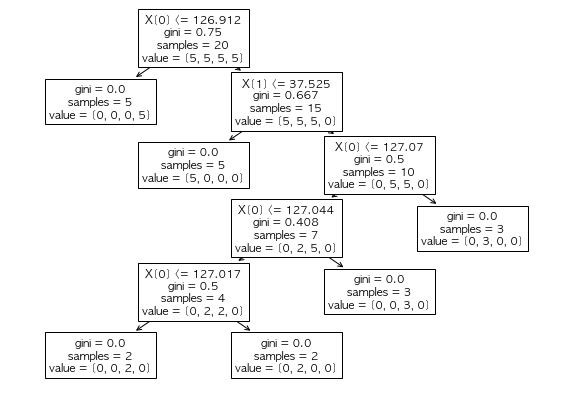

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(tr_clf)
plt.show()

> 최종노드의 gini(불순도)는 0.0임 